Regresja logistyczna

In [5]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [22]:
def h_fun_logistic(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost_logistic(X, y, theta):
    h = h_fun_logistic(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1-y)*np.log(1-h)

    return (y_1 + y_0).sum() / X.shape[1]

def logistic_regression_high_dim(X,y,eps,alpha):
    n, m = X.shape
    theta = np.zeros((n, 1))
    cost = calculate_cost_logistic(X,y,theta)

    while True:
        h_y_diff = h_fun_logistic(X,theta) - y
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m

        previous_cost,  cost = cost, calculate_cost_logistic(X,y, theta)
        if np.abs(previous_cost - cost) < eps:
            break
    return theta

In [3]:
X1 = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y1 = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])
eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 1e-3 # learning rate

theta1 = logistic_regression_high_dim(X1,y1,eps,alpha)

print(theta1)

[[-9.87768605]
 [ 3.86694671]]


[[1.63652431e-04 1.13031420e-03 3.54384368e-02 3.55027152e-01
  7.91907089e-01 8.91856746e-01 9.99460093e-01 9.99998889e-01]]


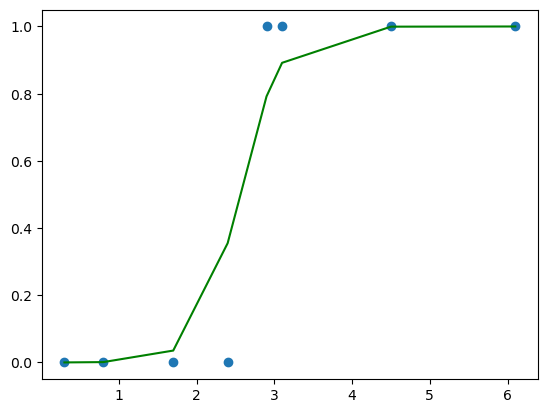

In [4]:
plt.scatter(X1[1],y1)

plt.plot(X1[1], h_fun_logistic(X1,theta1).flatten(),'green')
print(h_fun_logistic(X1,theta1))

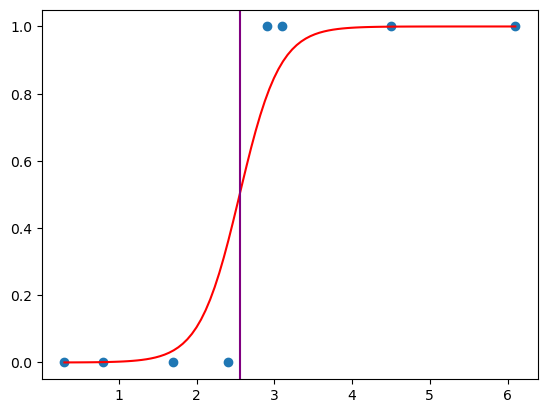

In [9]:

x_range = np.linspace(min(X1[1]), max(X1[1]), 100)
X_plot = np.vstack((np.ones_like(x_range), x_range))
y_pred2 = h_fun_logistic(X_plot, theta1)

plt.scatter(X1[1],y1)
plt.plot(x_range, y_pred2.flatten(), label="Regresja logistyczna", color="red")


decision_boundary_x = -theta1[0, 0] / theta1[1, 0]
plt.axvline(decision_boundary_x, color="purple")

X2.shape=(3, 100)
y2.shape=(1, 100)


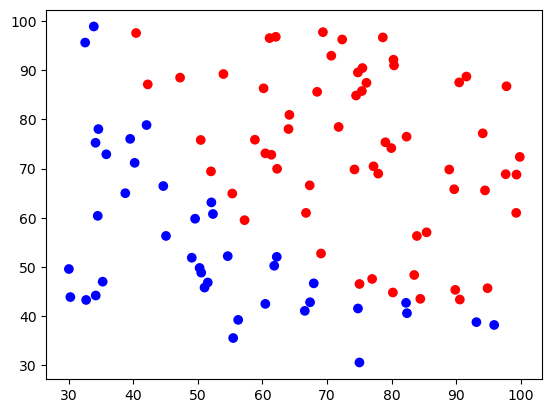

In [10]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y2 = data[:, 2:3].T
    x2 = data[:, :2].T
    X2 = np.concatenate([np.ones([1, x2.shape[1]]), x2])


 
print(f'{X2.shape=}')
print(f'{y2.shape=}')
plt.scatter(X2[1],X2[2], c=y2,cmap='bwr')

[[-18.22351245]
 [  0.15802029]
 [  0.13378266]]


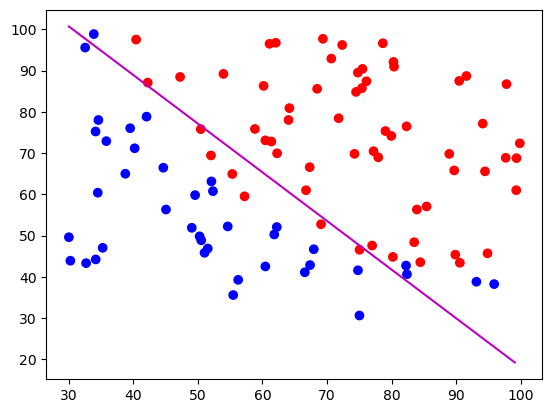

In [24]:
eps = 1e-6  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.005  # learning rate
theta2 = logistic_regression_high_dim(X2,y2,eps,alpha)

print(theta2)
x1_db = np.arange(X2[1, :].min(), X2[1, :].max(), 1)
x2_db = -theta2[0, 0]/theta2[2, 0] - (theta2[1, 0]/theta2[2, 0])*x1_db
plt.plot(x1_db, x2_db, '-m')
plt.scatter(X2[1],X2[2], c = y2, cmap='bwr')

In [42]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X3 = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

X3_max = X3.max(axis=1)
X3_max.shape = [X3_max.shape[0], 1]
X3_min = X3.min(axis=1)
X3_min[0] = 0
X3_min.shape = [X3_min.shape[0], 1]
X3_scaled = (X3 - X3_min) / (X3_max - X3_min)

In [67]:
eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.1  # learning rate
theta3 = logistic_regression_high_dim(X3_scaled,y,eps, alpha)
print(theta3)

[[-19.32596464]
 [ 51.66030925]
 [ 17.85925773]
 [-34.35453547]]


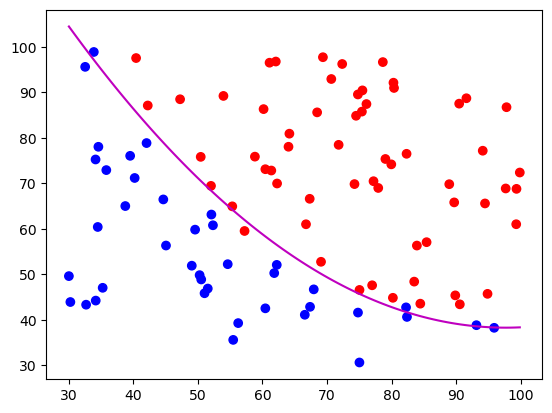

In [ ]:
plt.scatter(X3[1],X3[2], c = y, cmap='bwr')

x1_db = np.linspace(X3[1, :].min(), X3[1, :].max(), 100) # wartosci po osi X

x1_scaled = (x1_db - X3_min[1,0]) / (X3_max[1,0] - X3_min[1,0])  # dla thety 2

x1_squared = x1_db**2
x1_squared_scaled = (x1_squared - X3_min[3,0]) / (X3_max[3,0]- X3_min[3,0]) # dla thety 4

# Obliczenie x2 na podstawie równania: theta0 + theta1*x1 + theta3*x1² + theta2*x2 = 0
x2_scaled = -(theta3[0, 0] + theta3[1,0]*x1_scaled + theta3[3,0]*x1_squared_scaled) / theta3[2,0]
x2_db = x2_scaled * (X3_max[2,0]- X3_min[2,0]) + X3_min[2,0]

plt.plot(x1_db, x2_db, '-m')
